In [2]:
pip install minisom # mengunduh dan menginstal pustaka "minisom" dalam lingkungan Python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
from minisom import MiniSom  # import, membuat dan melatih SOM.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets # impor yang mengimpor modul datasets dari pustaka Scikit-Learn (sklearn)

In [4]:
# Load dataset
iris = datasets.load_iris() # menggunakan modul datasets untuk memuat dataset "Iris".
data = iris.data # mengambil data dari objek iris dan menyimpannya dalam variabel data

In [5]:
# Normalisasi data
data = data / data.max(axis=0) # menghitung nilai maksimum dalam setiap kolom atribut dari data.

In [11]:
# Inisialisasi SOM
map_size = (10, 10) # menginisialisasi variabel map_size dengan nilai (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)
# membuat objek SOM dengan map_size[0] dan map_size[1] adalah ukuran peta SOM,
# jumlah fitur dalam data, yang akan digunakan untuk menginisialisasi bobot-bobot SOM,
# sigma=0.5 adalah parameter yang mengatur lebar dari fungsi Gaussian,
# learning_rate=0.5 adalah laju pembelajaran.

In [12]:
# Inisialisasi bobot secara acak
som.random_weights_init(data) # menginisialisasi bobot-bobot SOM secara acak

In [8]:
# Pelatihan SOM
num_epochs = 100 # menginisialisasi variabel num_epochs dengan nilai 100
som.train_random(data, num_epochs) # pernyataan yang melakukan pelatihan SOM pada data.

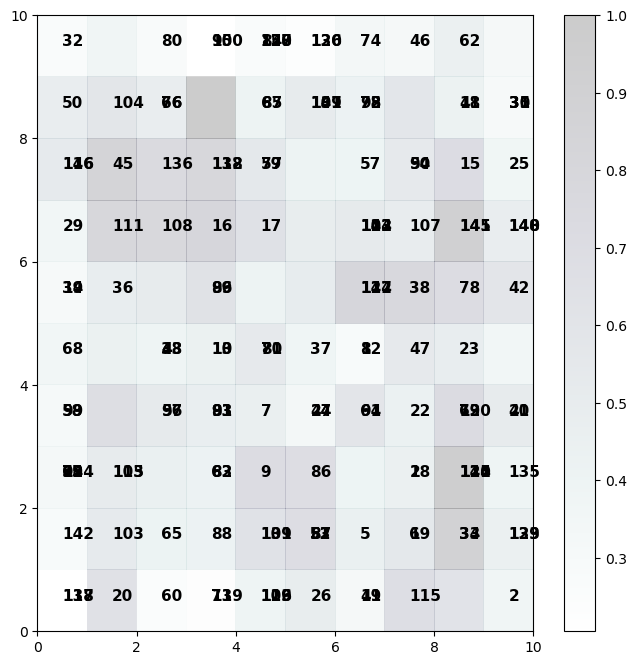

In [9]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()